In [4]:
!pip install opencv-python

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
import requests
import math
from skimage import io
from sklearn.cluster import KMeans
from collections import Counter
%matplotlib inline

In [2]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()


In [3]:
pn = pd.read_csv('interiorImg.csv', encoding = "utf-8-sig")

# 색상 추출 알고리즘

{0: 0.4, 1: 0.13, 2: 0.29, 3: 0.02, 4: 0.16}
['191, 184, 177', '146, 132, 115', '175, 162, 149', '88, 73, 61', '208, 223, 227']


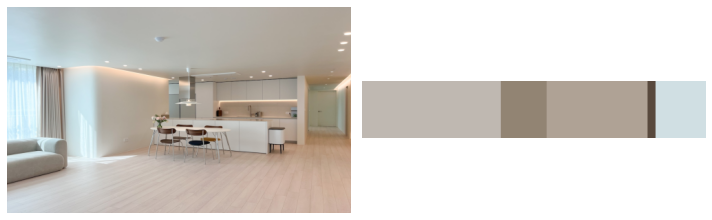

1
{0: 0.2, 1: 0.2, 2: 0.29, 3: 0.1, 4: 0.21}
['235, 232, 227', '151, 121, 86', '208, 196, 184', '97, 81, 56', '178, 159, 138']


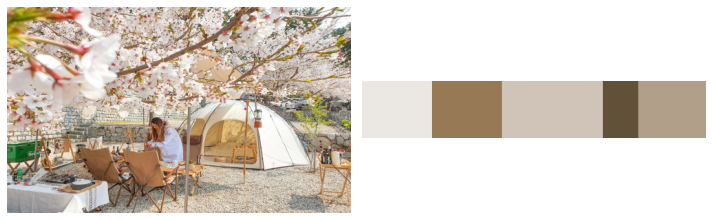

2
{0: 0.23, 1: 0.21, 2: 0.2, 3: 0.27, 4: 0.09}
['166, 172, 166', '118, 89, 71', '142, 132, 115', '196, 207, 204', '62, 42, 35']


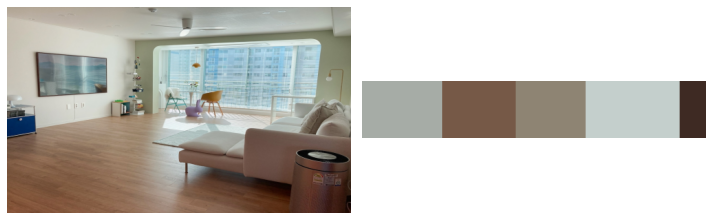

3
{0: 0.32, 1: 0.19, 2: 0.05, 3: 0.34, 4: 0.1}
['231, 230, 210', '190, 183, 150', '100, 100, 42', '216, 208, 175', '161, 148, 106']


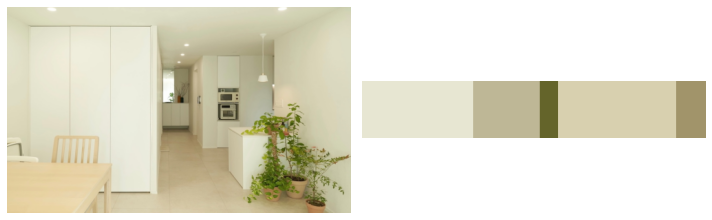

4
{0: 0.24, 1: 0.17, 2: 0.16, 3: 0.26, 4: 0.17}
['242, 242, 240', '120, 70, 31', '147, 142, 128', '198, 192, 179', '163, 101, 52']


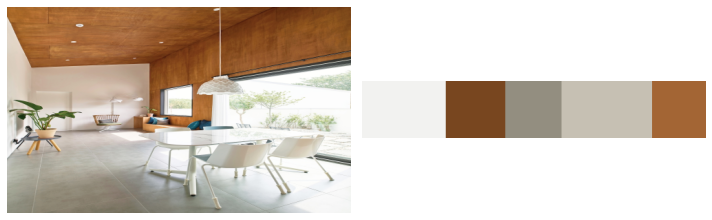

5


In [4]:
from skimage import io
from sklearn.cluster import KMeans
from collections import Counter

progress = 0
resultList=[]
titleList = []
colorList1 = []
colorList2 = [] 
colorList3 = []
colorList4 = []
colorList5 = []
ratioList = []
urlList = []
for i in range(5):
    try:
        # 이미지 읽기
        image = cv.imread("interiorImg/interior" +str(i) +".jpg")

        # openCV는 이미지를 BGR방식으로 읽어와서 RGB방식으로 바꿔준다.
        img = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        # 진행 상황
        progress += 1
        #가로, 세로 길이
        dim = (500, 300)
        # 이미지 사이즈를 변경(확대, 축소 등)
        img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
        # 3열이 되도록 가변적으로 설정
        img.reshape(-1, 3)
        #
        unique, counts = np.unique(img.reshape(-1, 3), axis=0, return_counts=True)

        clt = KMeans(n_clusters=5)
        clt.fit(img.reshape(-1, 3))

        clt.labels_

        clt.cluster_centers_

        def palette_perc(k_cluster):
            width = 300
            # 높이 50, 너비가 300 픽셀인 이미지에 색 그룹을 보여주고 각 색상군을 팔레트에 보여줌
            palette = np.zeros((50, width, 3), np.uint8) # uint8 0~255까지 숫자
            
            n_pixels = len(k_cluster.labels_)
            counter = Counter(k_cluster.labels_) # cluster에 픽셀 개수를 세어 줌
            perc = {}
            for i in counter:
                perc[i] = np.round(counter[i]/n_pixels, 2)
            # 비율을 딕셔너리 형태로 바꿔준다
            perc = dict(sorted(perc.items()))
            # 비율에 쉼표를 부여해 줌
            percStr = str(perc[0])+", " +str(perc[1])+", " +str(perc[2])+", " +str(perc[3])+", " +str(perc[4])
            ratioList.append(percStr)
            print(perc)

            result = ""
            for i in range(0, 5):
                for k in range(0, 3):
                    # rgb값 소수점 제거
                    result += ", " + str(math.trunc(k_cluster.cluster_centers_[i][k]))
                result = result[2:]
                resultList.append(result)
                result = ""
            print(resultList)   
            step = 0
            # 각 군집의 평균 값을 반복해서 돌려준다.
            for idx, centers in enumerate(k_cluster.cluster_centers_): 
                # 팔레트 rgb값
                palette[:, step:int(step + perc[idx]*width+1), :] = centers
                step += int(perc[idx]*width+1)
            return palette
        # 데이터를 훈련한다.
        clt_1 = clt.fit(img.reshape(-1, 3))
        # 이미지를 보여줌
        show_img_compar(img, palette_perc(clt_1))
        
        titleList.append(pn.loc[:, '이름'][i])
        colorList1.append(resultList[0])
        colorList2.append(resultList[1])
        colorList3.append(resultList[2])
        colorList4.append(resultList[3])
        colorList5.append(resultList[4])
        urlList.append(pn.loc[:, '이미지'][i])
        print(progress)
        resultList=[]
    except:
        print("에러 처리")

In [8]:
dic = {'i_name':titleList, 'i_ratio':ratioList, 'i_rgb1' : colorList1, 'i_rgb2' : colorList2, 'i_rgb3': colorList3, 'i_rgb4' : colorList4, 'i_rgb5' : colorList5, 'i_url' : urlList}
Loc = pd.DataFrame(dic)
Loc

,i_name,i_ratio,i_rgb1,i_rgb2,i_rgb3,i_rgb4,i_rgb5,i_url
0,"곡선과 직선의 조화, 홈오피스를 품은 심플한 신혼집","0.4, 0.02, 0.16, 0.29, 0.13","191, 184, 177","88, 73, 61","208, 223, 227","175, 162, 149","146, 132, 115",https://image.ohou.se/i/bucketplace-v2-develop...
1,봄에는 역시 벚꽃 캠핑🌸 사계절 감성 캠핑 시작!,"0.21, 0.2, 0.2, 0.1, 0.29","177, 159, 138","235, 232, 227","152, 121, 87","98, 81, 56","208, 196, 183",https://image.ohou.se/i/bucketplace-v2-develop...
2,"우드 바탕에 유니크 컬러 더하기, 매력만점 하우스 완성","0.2, 0.23, 0.09, 0.27, 0.21","142, 132, 115","167, 172, 166","63, 42, 36","196, 207, 204","118, 89, 71",https://image.ohou.se/i/bucketplace-v2-develop...
3,무몰딩&타일시공으로 군더더기 없이 깔끔한 18평 아파트,"0.34, 0.1, 0.32, 0.05, 0.19","215, 208, 175","160, 148, 106","231, 230, 210","99, 100, 42","190, 182, 149",https://image.ohou.se/i/bucketplace-v2-develop...
4,"실거주 집, 숙소, 문화 공간을 한 자리에","0.18, 0.26, 0.24, 0.16, 0.16","162, 101, 51","198, 192, 179","242, 242, 240","147, 142, 128","119, 69, 31",https://image.ohou.se/i/bucketplace-v2-develop...
...,...,...,...,...,...,...,...,...
3424,"제주, 그리고 우리 셋 삶의 공간","0.15, 0.25, 0.15, 0.17, 0.28","70, 59, 53","206, 206, 209","24, 20, 19","149, 145, 143","112, 90, 70",https://image.ohou.se/i/bucketplace-v2-develop...
3425,"우리에게 꼭 맞는 곳, 행복을 쌓아갈 신혼집","0.28, 0.11, 0.19, 0.05, 0.37","246, 242, 236","130, 105, 82","191, 162, 132","63, 56, 49","222, 207, 188",https://image.ohou.se/i/bucketplace-v2-develop...
3426,아이들과의 추억으로 채운 따뜻한 집,"0.13, 0.27, 0.23, 0.16, 0.21","69, 57, 42","207, 206, 197","120, 109, 94","249, 250, 247","174, 168, 155",https://image.ohou.se/i/bucketplace-v2-develop...
3427,차가운 집에 온기를 불어넣는 법,"0.31, 0.22, 0.21, 0.13, 0.12","227, 220, 211","173, 149, 122","205, 188, 168","134, 110, 84","95, 72, 48",https://image.ohou.se/i/bucketplace-v2-develop...


In [9]:
Loc.to_csv("인테리어색상추가_최종.csv", encoding="utf-8-sig")

# 색상 분류

In [5]:
# csv 읽어오기
a = pd.read_csv('color추가.csv')

In [6]:
# rgb값을 train과 test로 분류
train = a.iloc[:, 2:5]
test = a.iloc[:, 5]

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# 이웃을 1로 설정해서 가장 근접한 것만 불러오기
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train,test)

KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.score(train, test)

0.9741935483870968

In [8]:
import warnings

In [9]:
# 경고창 무시하기
warnings.filterwarnings('ignore')

In [15]:
# 학습 데이터 예측하기
knn.predict([[100,22,35]])[0]

'Claret'

In [18]:
# 훈련 데이터
origin = pd.read_csv('인테리어색상추가_최종.csv',encoding = 'utf-8-sig')

In [19]:
# 실습 데이터
test = pd.read_csv('색상추가test_최종.csv',encoding = 'euc-kr')

In [20]:
rgb1 = test.loc[:,'1r':'1b']

rgb2 = test.loc[:,'2r':'2b']

rgb3 = test.loc[:,'3r':'3b']

rgb4 = test.loc[:,'4r':'4b']

rgb5 = test.loc[:,'5r':'5b']

In [21]:
# 예측하기
result1 = pd.DataFrame(knn.predict(rgb1))

result2 = pd.DataFrame(knn.predict(rgb2))

result3 = pd.DataFrame(knn.predict(rgb3))

result4 = pd.DataFrame(knn.predict(rgb4))

result5 = pd.DataFrame(knn.predict(rgb5))

In [22]:
# concat : 데이터프레임 결합
final_result = pd.concat([origin,result1,result2,result3,result4,result5],axis = 1)

In [23]:
final_result.columns = ['Unnamed: 0',     'i_name',    'i_ratio',     'i_rgb1',     'i_rgb2',
           'i_rgb3',     'i_rgb4',     'i_rgb5',      'i_url',            1,
                  2,            3,            4,            5]

In [24]:
final_result[['Unnamed: 0',     'i_name',    'i_ratio',     'i_rgb1',1,     'i_rgb2',
           'i_rgb3',     'i_rgb4',     'i_rgb5',      'i_url']]

,Unnamed: 0,i_name,i_ratio,i_rgb1,1,i_rgb2,i_rgb3,i_rgb4,i_rgb5,i_url
0,0,"곡선과 직선의 조화, 홈오피스를 품은 심플한 신혼집","0.4, 0.02, 0.16, 0.29, 0.13","191, 184, 177",Silver,"88, 73, 61","208, 223, 227","175, 162, 149","146, 132, 115",https://image.ohou.se/i/bucketplace-v2-develop...
1,1,봄에는 역시 벚꽃 캠핑🌸 사계절 감성 캠핑 시작!,"0.21, 0.2, 0.2, 0.1, 0.29","177, 159, 138",Nobel,"235, 232, 227","152, 121, 87","98, 81, 56","208, 196, 183",https://image.ohou.se/i/bucketplace-v2-develop...
2,2,"우드 바탕에 유니크 컬러 더하기, 매력만점 하우스 완성","0.2, 0.23, 0.09, 0.27, 0.21","142, 132, 115",Almond Frost,"167, 172, 166","63, 42, 36","196, 207, 204","118, 89, 71",https://image.ohou.se/i/bucketplace-v2-develop...
3,3,무몰딩&타일시공으로 군더더기 없이 깔끔한 18평 아파트,"0.34, 0.1, 0.32, 0.05, 0.19","215, 208, 175",Desert Sand,"160, 148, 106","231, 230, 210","99, 100, 42","190, 182, 149",https://image.ohou.se/i/bucketplace-v2-develop...
4,4,"실거주 집, 숙소, 문화 공간을 한 자리에","0.18, 0.26, 0.24, 0.16, 0.16","162, 101, 51",Coyote Brown,"198, 192, 179","242, 242, 240","147, 142, 128","119, 69, 31",https://image.ohou.se/i/bucketplace-v2-develop...
...,...,...,...,...,...,...,...,...,...,...
3424,3424,"제주, 그리고 우리 셋 삶의 공간","0.15, 0.25, 0.15, 0.17, 0.28","70, 59, 53",Espresso,"206, 206, 209","24, 20, 19","149, 145, 143","112, 90, 70",https://image.ohou.se/i/bucketplace-v2-develop...
3425,3425,"우리에게 꼭 맞는 곳, 행복을 쌓아갈 신혼집","0.28, 0.11, 0.19, 0.05, 0.37","246, 242, 236",Saltpan,"130, 105, 82","191, 162, 132","63, 56, 49","222, 207, 188",https://image.ohou.se/i/bucketplace-v2-develop...
3426,3426,아이들과의 추억으로 채운 따뜻한 집,"0.13, 0.27, 0.23, 0.16, 0.21","69, 57, 42",Espresso,"207, 206, 197","120, 109, 94","249, 250, 247","174, 168, 155",https://image.ohou.se/i/bucketplace-v2-develop...
3427,3427,차가운 집에 온기를 불어넣는 법,"0.31, 0.22, 0.21, 0.13, 0.12","227, 220, 211",Timberwolf,"173, 149, 122","205, 188, 168","134, 110, 84","95, 72, 48",https://image.ohou.se/i/bucketplace-v2-develop...


In [25]:
# 결과물
final_result.to_csv("색상추가openCV_최종.csv", encoding="utf-8-sig")